Exploratory Data Analysis

In [ ]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda\envs\cursito\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Filter for US Data Analyst Roles

In [14]:
df_DA_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()


Jobs Locations for Data Analyst 

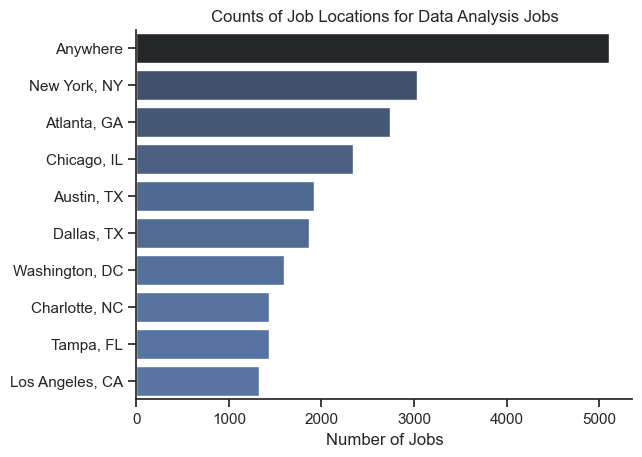

In [22]:
import seaborn as sns

df_plot = df_DA_us['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analysis Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Jobs Opportunities

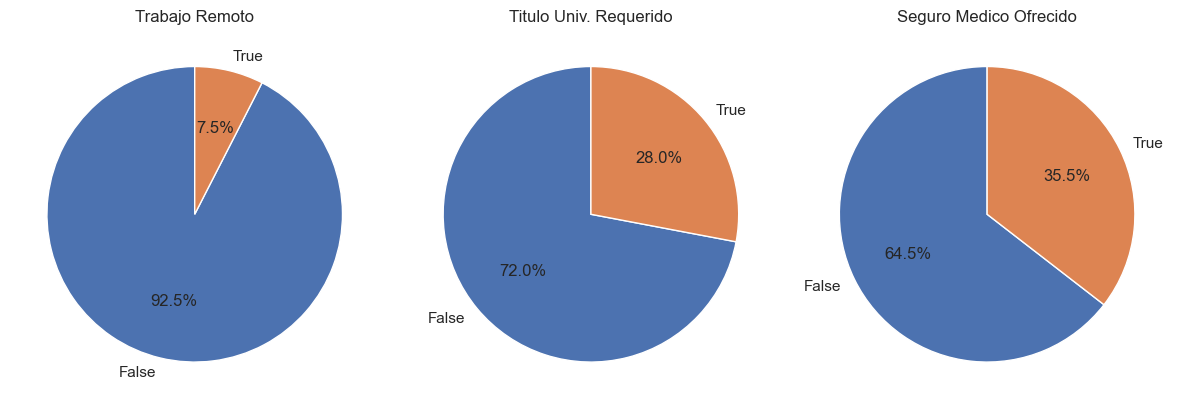

In [24]:
fig, ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home':'Trabajo Remoto',
    'job_no_degree_mention':'Titulo Univ. Requerido',
    'job_health_insurance': 'Seguro Medico Ofrecido'
}

fig.set_size_inches((12,5))

for i , (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_us[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

Companies with most Data Analyst jobs

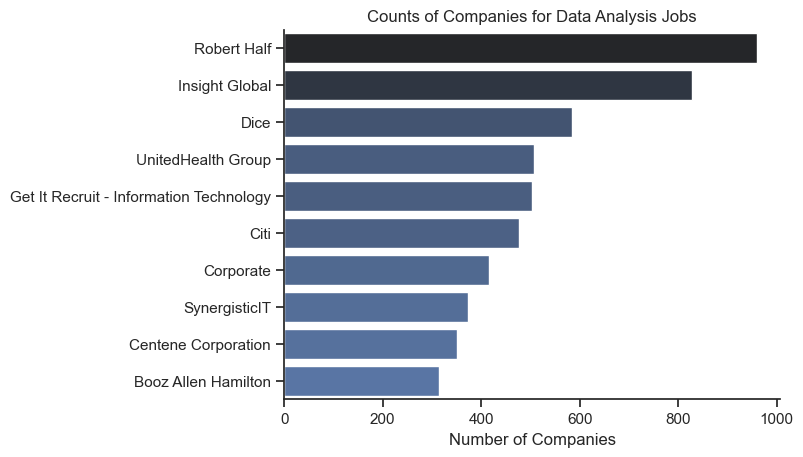

In [25]:
df_plot = df_DA_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analysis Jobs')
plt.xlabel('Number of Companies')
plt.ylabel('')
plt.show()

Histogram for salary distribution

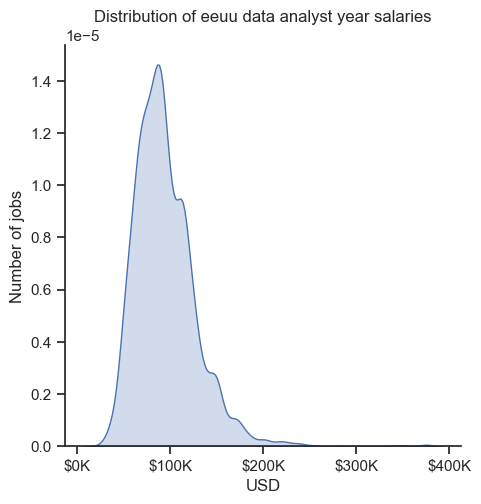

In [27]:
sns.set_theme(style='ticks')
sns.displot(df_DA_us['salary_year_avg'], kind='kde', fill=True)

ax = plt.gca()
plt.title('Distribution of eeuu data analyst year salaries')
plt.xlabel('USD')
plt.ylabel('Number of jobs')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))